In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:03<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Define paths for train and test datasets
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
# Create a DataFrame from the image data (x_data) and labels (y_data) to organize the dataset

data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2157.80it/s]


In [8]:
# Display the shape of the DataFrame
data.shape

(22564, 2)

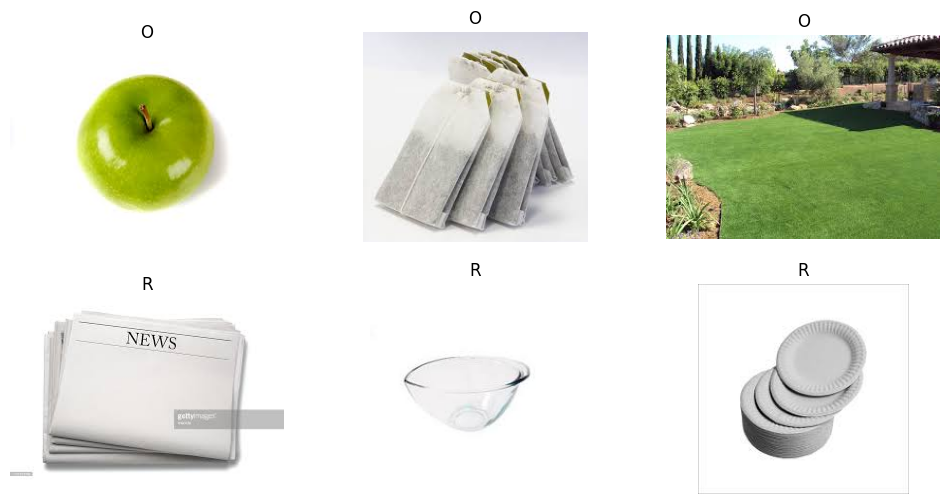

In [9]:
import matplotlib.pyplot as plt
import random
import os

# Visualize a few sample images from each class
def display_samples():
    classes = os.listdir(train_path)
    plt.figure(figsize=(12, 6))

    for i, class_name in enumerate(classes):
        class_folder = os.path.join(train_path, class_name)
        image_files = os.listdir(class_folder)

        # Randomly pick 3 images from the class
        sample_images = random.sample(image_files, 3)

        for j, image_file in enumerate(sample_images):
            img_path = os.path.join(class_folder, image_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(classes), 3, i * 3 + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{class_name}')

    plt.show()

display_samples()


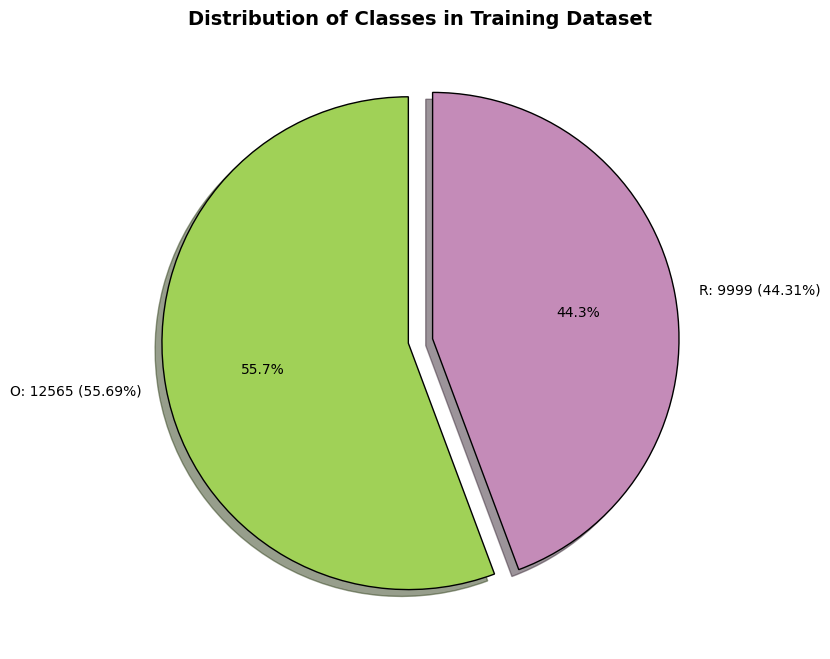

In [10]:
# Pie chart visualization with additional customizations

# Define custom colors for the pie chart
colors = ["#a0d157", "#c48bb8"]

# Create a figure with adjusted size for better readability
plt.figure(figsize=(8, 8))

# Pie chart with additional label formatting, count and percentage display
label_counts = data.label.value_counts()  # Get the count of each class

plt.pie(label_counts,
        labels=[f"{label}: {count} ({percent:.2f}%)" for label, count, percent in zip(label_counts.index, label_counts, 100 * label_counts / len(data))],
        autopct='%1.1f%%',  # Format the percentage display to one decimal place
        colors=colors,
        startangle=90,
        explode=[0.05, 0.05],  # Slightly "explode" the segments for emphasis
        shadow=True,  # Add shadow effect for better visualization
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'}  # Customize border for clarity
       )

# Title for the pie chart
plt.title("Distribution of Classes in Training Dataset", fontsize=14, fontweight='bold')

# Show the pie chart
plt.show()

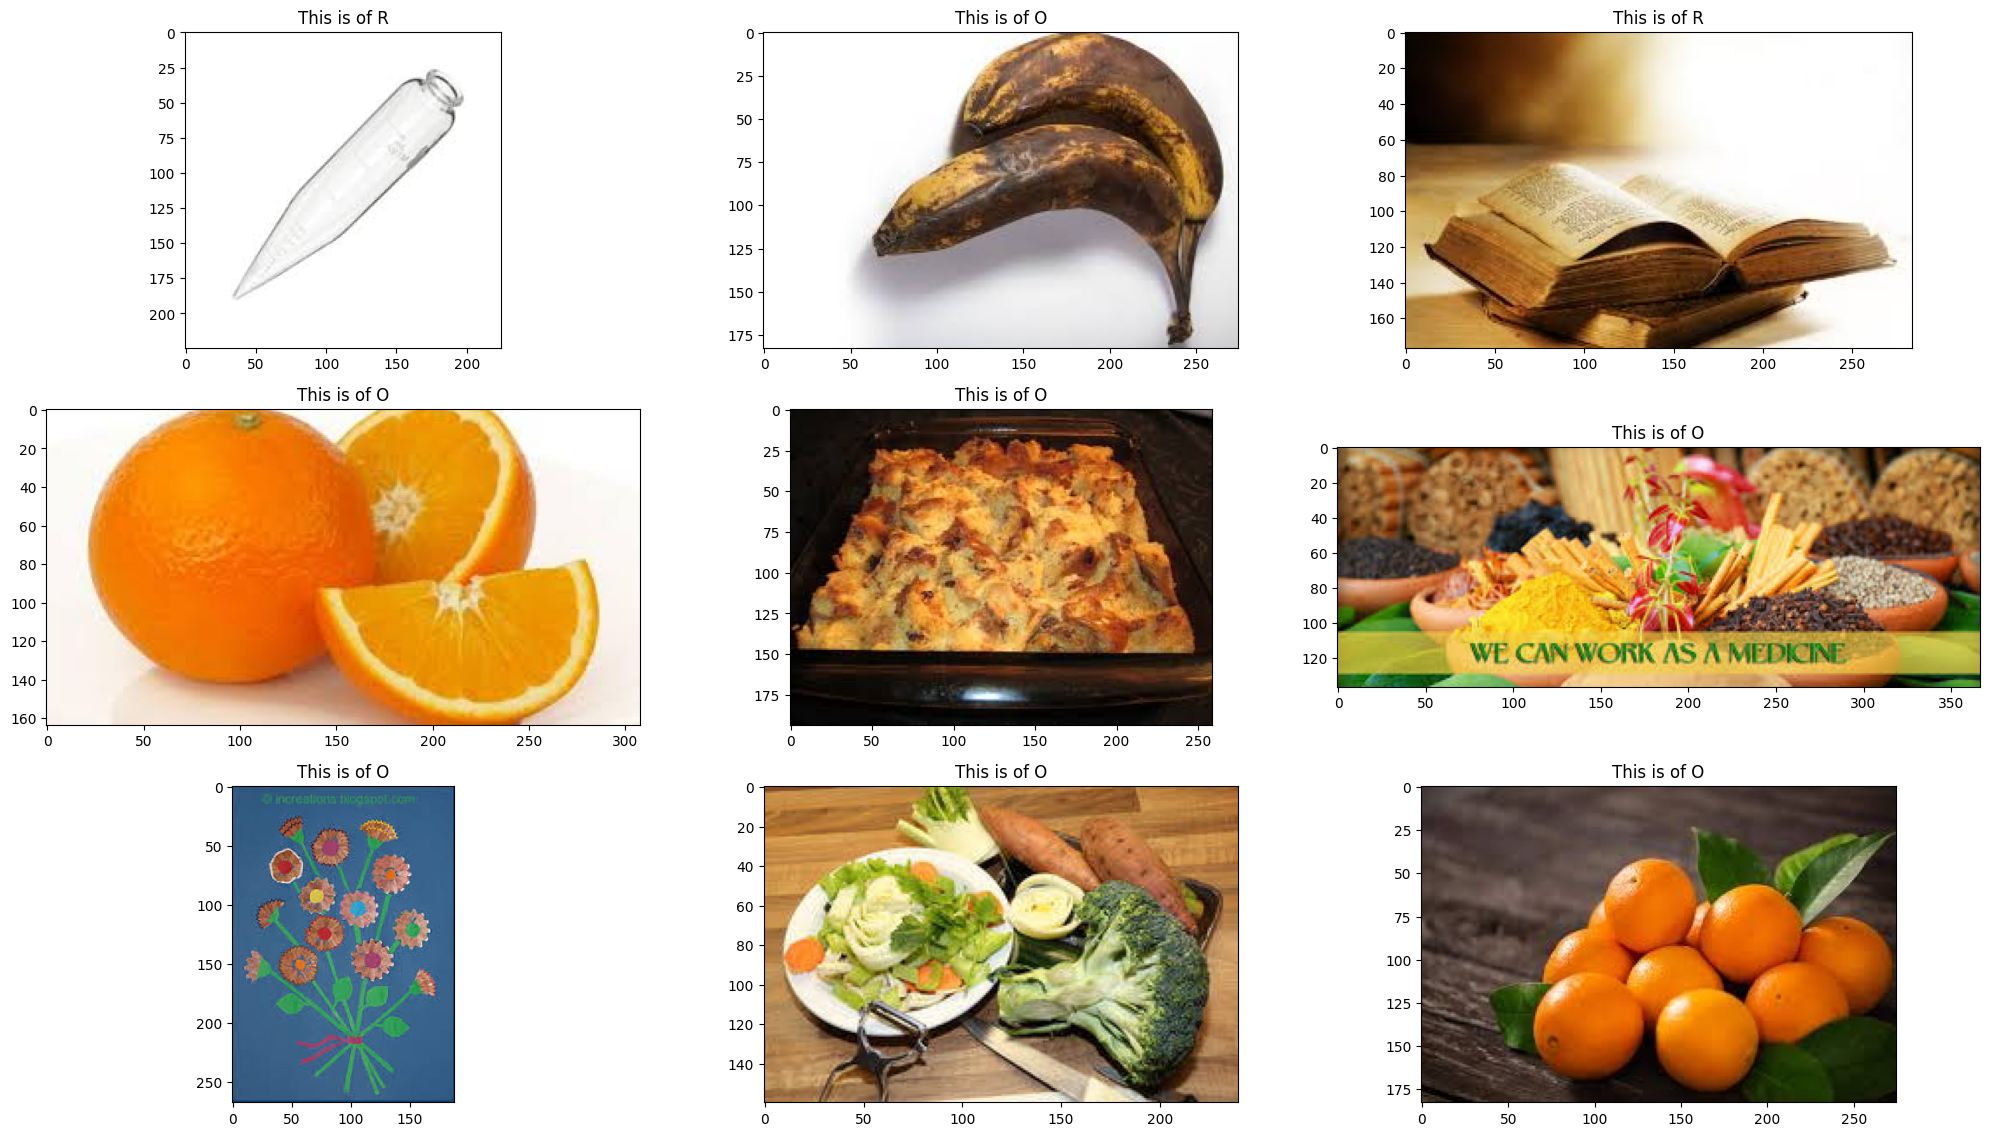

In [11]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
batch_size=32

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [23]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [24]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")
test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [25]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 63s 77ms/step - accuracy: 0.7695 - loss: 0.5249 - val_accuracy: 0.8599 - val_loss: 0.3505
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.8380 - loss: 0.3941 - val_accuracy: 0.8782 - val_loss: 0.2991
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.8583 - loss: 0.3532 - val_accuracy: 0.8790 - val_loss: 0.3039
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.8766 - loss: 0.3175 - val_accuracy: 0.8591 - val_loss: 0.3440
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8931 - loss: 0.2794 - val_accuracy: 0.8898 - val_loss: 0.2748
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.9070 - loss: 0.2430 - val_accuracy: 0.9045 - val_loss: 0.2715
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9285 - loss: 0.1953 - val_accuracy: 0.8878 - val_loss: 0.3603
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.9511 - loss: 0.1430 - 